In [2]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

#**Прогнозирование сердечных заболеваний**
---

###Данный датасет предоставляет возможность провести анализ факторов, влияющих на здоровье сердечно-сосудистой системы человека, что может помочь в разработке эффективных стратегий профилактики и лечения. Рассмотрим структуру и содержание этого датасета.

##**Задача**

Научиться прогнозировать возможное возникновение сердечно-сосудистых заболеваний методами машинного обучения

##**Описание датасета**




*   Объем данных: **445132** записи
*   Количество признаков: **40**
*   Количество классов: **2**
*   Типы и описание признаков:
  *   `State` (Штат, в котором проживает человек) - категориальный
  *   `Sex` (Пол человека) - категориальный
  *   `GeneralHealth` (Общее состояние здоровья оцениваемое человеком) - категориальный
  *   `PhysicalHealthDays` (Количество дней, когда физическое самочувствие было плохим за последние 30 дней) - количественный
  *   `MentalHealthDays` (Количество дней, когда психическое самочувствие было плохим за последние 30 дней) - количественный
  *   `LastCheckupTime` (Когда был последний медицинский осмотр) - категориальный
  *   `PhysicalActivities` (Активный ли образ жизни) - бинарный
  *   `SleepHours` (Количество часов сна в среднем за ночь) - количественный
  *   `RemovedTeeth` (Количество удаленных зубов) - категориальный
  *   `HadHeartAttack` (Был ли сердечный приступ) - бинарный
  *   `HadAngina` (Была ли стенокардия) - бинарный
  *   `HadStroke` (Был ли инсульт) - бинарный
  *   `HadAsthma` (Была ли астма) - бинарный
  *   `HadSkinCancer` (Был ли рак кожи) - бинарный
  *   `HadCOPD` (Была ли хроническая обструктивная болезнь легких (ХОБЛ)) - бинарный
  *   `HadDepressiveDisorder` (Было ли депрессивное расстройство) - бинарный
  *   `HadKidneyDisease` (Была ли болезнь почек) - бинарный
  *   `adArthritis` (Был ли артрит) - бинарный
  *   `HadDiabetes` (Был ли диабет) - категориальный
  *   `DeafOrHardOfHearing` (Есть ли проблемы со слухом) - бинарный
  *   `BlindOrVisionDifficulty` (Имеет ли проблемы со зрением или слепоту) - бинарный
  *   `DifficultyConcentrating` (Есть ли трудности с концентрацией) - бинарный
  *   `DifficultyWalking` (Есть ли трудности с ходьбой) - бинарный
  *   `DifficultyDressingBathing` (Есть ли трудности с одеванием/купанием) - бинарный
  *   `DifficultyErrands` (Есть ли трудности с выполнением повседневных дел) - бинарный
  *   `SmokerStatus` (Статус курильщика (например, курит или бросил)) - категориальный
  *   `ECigaretteUsage` (Использует ли электронные сигареты) - категориальный
  *   `ChestScan` (Делал ли сканирование грудной клетки) - бинарный
  *   `RaceEthnicityCategory` (Категория расы и этнической принадлежности) - категориальный
  *   `AgeCategory` (Категория возраста) - категориальный
  *   `HeightInMeters` (Рост в метрах) - количественный
  *   `WeightInKilograms` (Вес в килограммах) - количественный
  *   `BMI` (Индекс массы тела) - количественный
  *   `AlcoholDrinkers` (Пьет ли алкоголь) - бинарный
  *   `HIVTesting` (Делал ли тестирование на ВИЧ) - бинарный
  *   `FluVaxLast12` (Делал ли прививку от гриппа за последние 12 месяцев) - бинарный
  *   `PneumoVaxEver` (Делал ли прививку от пневмококка когда-либо) - бинарный
  *   `TetanusLast10Tdap` (Делал ли прививку от столбняка за последние 10 лет) - категориальный
  *   `HighRiskLastYear` (Был ли в высокой группе риска в течение последнего года) - бинарный
  *   `CovidPos` (Положительный ли результат теста на COVID-19) - категориальный
* **Есть** пропущенные значения
* Классы **несбалансированы**












## Чтение данных

In [3]:
data_raw = pd.read_csv(f'/content/sample_data/heart_2022_with_nans.csv')


In [5]:
data_raw

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

## Визуализация данных, основные значения

In [5]:
data_raw.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [6]:
corr_matrix = data_raw.corr(numeric_only=True)
corr_matrix

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
PhysicalHealthDays,1.000000,0.321349,-0.055906,-0.050867,0.072838,0.112865
MentalHealthDays,0.321349,1.000000,-0.129075,-0.049473,0.040345,0.075891
SleepHours,-0.055906,-0.129075,1.000000,-0.014668,-0.053521,-0.050805
HeightInMeters,-0.050867,-0.049473,-0.014668,1.000000,0.467892,-0.028349
WeightInKilograms,0.072838,0.040345,-0.053521,0.467892,1.000000,0.859557
BMI,0.112865,0.075891,-0.050805,-0.028349,0.859557,1.000000


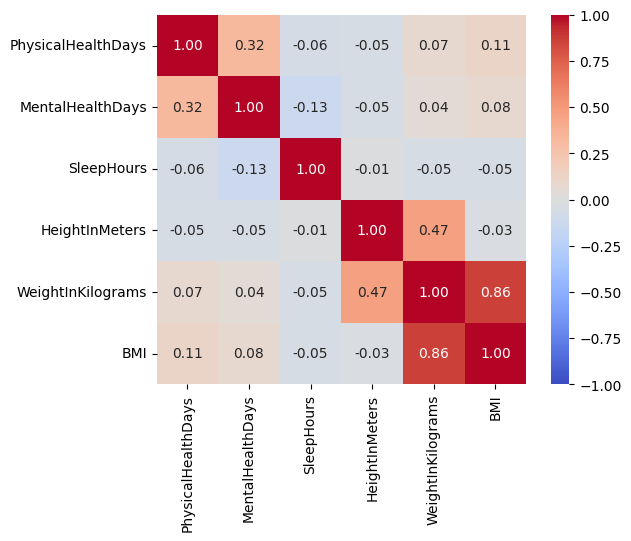

In [9]:
sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Исходя из вида данной матрицы, можно сделать следующие выводы:

* Наблюдается немалая корреляция между физическим и психическим состоянием
* Индекс массы тела напрямую зависит от веса, что очевидно
* Психическое состояние отрицательно коррелирует с показателелем количество часов сна
* Есть некая корреляция между физическим состоянием и индексом массы тела


### Продолжение визуализации и интерпретации некоторых данных

Зависимость наличия сердечных заболеваний от возраста:

In [7]:
HadHeartAttack_AgeCategory = data_raw.groupby(['AgeCategory', 'HadHeartAttack'], as_index=False).agg(count = ('AgeCategory', 'count'))
HadHeartAttack_AgeCategory

,AgeCategory,HadHeartAttack,count
0,Age 18 to 24,No,26676
1,Age 18 to 24,Yes,122
2,Age 25 to 29,No,21782
3,Age 25 to 29,Yes,119
4,Age 30 to 34,No,25508
5,Age 30 to 34,Yes,187
6,Age 35 to 39,No,28067
7,Age 35 to 39,Yes,318
8,Age 40 to 44,No,29347
9,Age 40 to 44,Yes,445


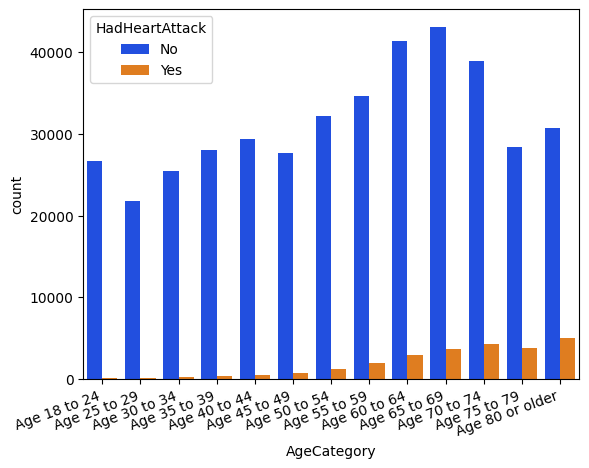

In [11]:
plt.xticks(rotation=20, ha='right')
sns.barplot(data=HadHeartAttack_AgeCategory, x='AgeCategory', y='count', hue="HadHeartAttack", palette='bright')
pass

Итоги:
* Чем выше возраст, тем большее число людей страдают от сердечных заболеваний
* Наблюдается активный рост сердечных заболеваний после 40

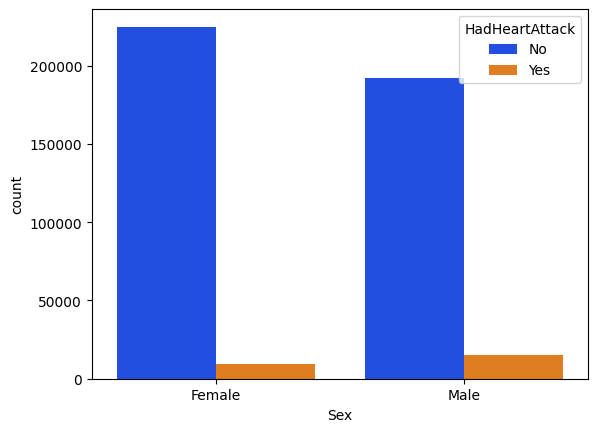

In [12]:
sns.countplot(data=data_raw, x='Sex', hue='HadHeartAttack', palette='bright')
pass

Итоги:
* Мужчины больше подвержены сердечным заболеванием, чем женщины

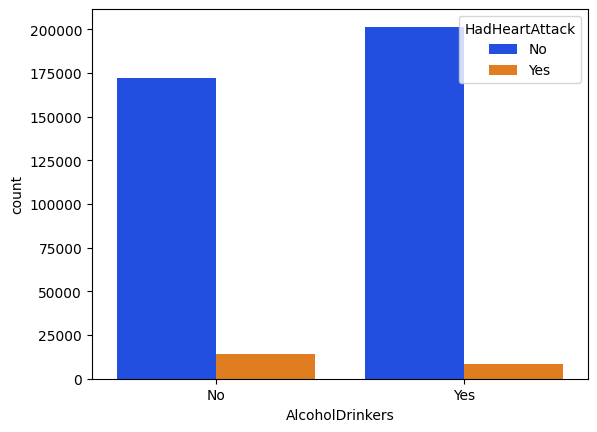

In [13]:
sns.countplot(data=data_raw, x='AlcoholDrinkers', hue='HadHeartAttack', palette='bright')
pass

Итоги:
* Люди, которые иногда выпивают алкоголь, чуть реже подтвергаются риску сердечных заболеваний, чем те, которые вообще не пьют

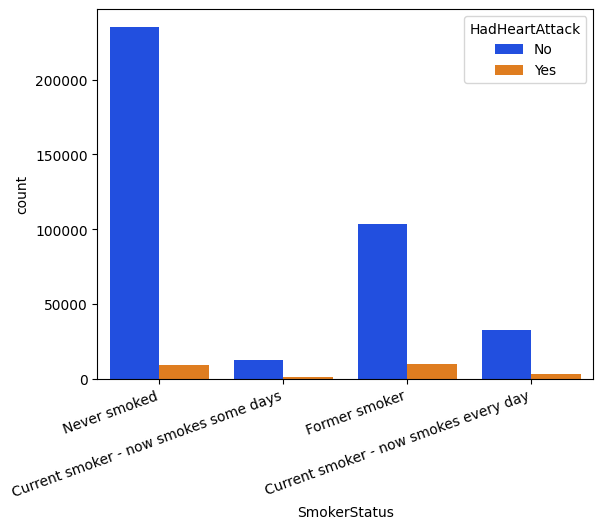

In [14]:
plt.xticks(rotation=20, ha='right')
sns.countplot(data=data_raw, x='SmokerStatus', hue='HadHeartAttack', palette='bright')
pass

Итоги:
* У курящих людей риск сердечных заболеваний выше тех, кто не курит


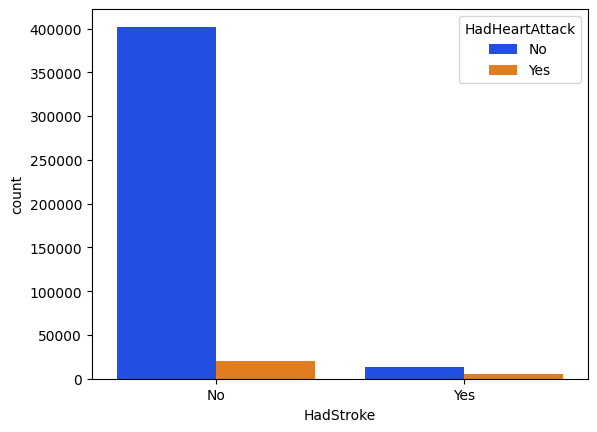

In [15]:
sns.countplot(data=data_raw, x='HadStroke', hue='HadHeartAttack', palette='bright')
pass

Итоги:
* Около трети людей, у кого случался инсульт, страдают от сердечно-сосудистых заболеваний

## Борьба с пропущенными значениями

Проверка пропущенных значений

In [16]:
data_raw.isna().sum()

,0
State,0
Sex,0
GeneralHealth,1198
PhysicalHealthDays,10927
MentalHealthDays,9067
LastCheckupTime,8308
PhysicalActivities,1093
SleepHours,5453
RemovedTeeth,11360
HadHeartAttack,3065


Избавимся от строк, у которых колонка HadHeartAttack имеет пропущенное значение, так как мы не можем корректно заполнить данное поле

In [8]:
data = data_raw.dropna(subset=['HadHeartAttack'])
data = data.dropna(subset=['RaceEthnicityCategory'])
data = data.dropna(subset=['AgeCategory'])
data = data.dropna(subset=['HighRiskLastYear'])

In [18]:
data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
5,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,Yes,...,1.80,84.82,26.08,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445126,Virgin Islands,Male,Good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,8.0,None of them,No,...,1.83,104.33,31.19,Yes,NaN,No,No,NaN,No,Yes
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


Борьба с пропущенными значениями количественных переменных: заполнение пропущенных значений медианой

In [9]:
numeric_data = data.select_dtypes(include=['number'])
data[numeric_data.columns] = numeric_data.fillna(numeric_data.median(axis=0))


In [20]:
data.isna().sum()

,0
State,0
Sex,0
GeneralHealth,811
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,6213
PhysicalActivities,694
SleepHours,0
RemovedTeeth,8359
HadHeartAttack,0


Борьба с пропущенными значениями номинальных переменных: заполнение пропущеных значений модой

In [ ]:
# Признак - общий показатель здоровья
data['GeneralHealth'].fillna(data['GeneralHealth'].mode().iloc[0], inplace=True)

# Признак - последнее вермя проверки
data['LastCheckupTime'].fillna(data['LastCheckupTime'].mode().iloc[0], inplace=True)

# Признак - ведёт ли человек активный образ жизни
data['PhysicalActivities'].fillna(data['PhysicalActivities'].mode().iloc[0], inplace=True)

# Признак - была ли у человека стенокардия
data['HadAngina'].fillna(data['HadAngina'].mode().iloc[0], inplace=True)

# Признак - был ли у человека инсульт
data['HadStroke'].fillna(data['HadStroke'].mode().iloc[0], inplace=True)

# Признак - была ли у человека астма
data['HadAsthma'].fillna(data['HadAsthma'].mode().iloc[0], inplace=True)

# Признак - был ли у человека рак кожи
data['HadSkinCancer'].fillna(data['HadSkinCancer'].mode().iloc[0], inplace=True)

# Признак - был ли у человека заболеваний легких
data['HadCOPD'].fillna(data['HadCOPD'].mode().iloc[0], inplace=True)

# Признак - был ли у человека депрессивные расстройства
data['HadDepressiveDisorder'].fillna(data['HadDepressiveDisorder'].mode().iloc[0], inplace=True)

# Признак - было ли у человека заболевание почек
data['HadKidneyDisease'].fillna(data['HadKidneyDisease'].mode().iloc[0], inplace=True)

# Признак - был ли у человека артрит
data['HadArthritis'].fillna(data['HadArthritis'].mode().iloc[0], inplace=True)

# Признак - был ли диабет
data['HadDiabetes'].fillna(data['HadDiabetes'].mode().iloc[0], inplace=True)

# Признак - были ли проблемы со слухом
data['DeafOrHardOfHearing'].fillna(data['DeafOrHardOfHearing'].mode().iloc[0], inplace=True)

# Признак - были ли проблемы со зрением
data['BlindOrVisionDifficulty'].fillna(data['BlindOrVisionDifficulty'].mode().iloc[0], inplace=True)

# Признак - были ли проблемы с концентрацией
data['DifficultyConcentrating'].fillna(data['DifficultyConcentrating'].mode().iloc[0], inplace=True)

# Признак - трудности передвижения
data['DifficultyWalking'].fillna(data['DifficultyWalking'].mode().iloc[0], inplace=True)

# Признак - сложности с одеванием и мытьём
data['DifficultyDressingBathing'].fillna(data['DifficultyDressingBathing'].mode().iloc[0], inplace=True)

# Признак - сложности выполнения в повседневных делах
data['DifficultyErrands'].fillna(data['DifficultyErrands'].mode().iloc[0], inplace=True)

# Признак - статус курения
data['SmokerStatus'].fillna(data['SmokerStatus'].mode().iloc[0], inplace=True)

# Признак - Курит ли электронные сигареты
data['ECigaretteUsage'].fillna(data['ECigaretteUsage'].mode().iloc[0], inplace=True)

# Признак - проходил ли обследование грудной клетки
data['ChestScan'].fillna(data['ChestScan'].mode().iloc[0], inplace=True)

# Признак - пьёт ли алкоголь
data['AlcoholDrinkers'].fillna(data['AlcoholDrinkers'].mode().iloc[0], inplace=True)

# Признак - статус теста на ковид
data['CovidPos'].fillna(data['CovidPos'].mode().iloc[0], inplace=True)


Некоторые признаки можно удалить из наших данных, так как сильного эффекта они не будут давать.

In [11]:
# Удалим столбец 'RemovedTeeth'
data = data.drop('RemovedTeeth', axis=1)

# Удалим столбец 'HIVTesting'
data = data.drop('HIVTesting', axis=1)

# Удалим столбец 'FluVaxLast12'
data = data.drop('FluVaxLast12', axis=1)

# Удалим столбец 'PneumoVaxEver'
data = data.drop('PneumoVaxEver', axis=1)

# Удалим столбец 'TetanusLast10Tdap'
data = data.drop('TetanusLast10Tdap', axis=1)

Пропущенных значений не осталось:

In [12]:
data.isna().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
HadHeartAttack,0
HadAngina,0


In [24]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

## Бинаризация категориальных признаков

Необходимо закодировать категориальные признаки с помощью числовых, для дальнейшего применения методов машинного обучения библиотеки **scikit-learn**

Разделим наши признаки на категориальные и числовые

In [13]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HighRiskLastYear', 'CovidPos']
['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


In [14]:
data_describe = data.describe(include = [object])

Разделим категориальные признаки на бинарные и небинарные

In [15]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Sex', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HighRiskLastYear'] ['State', 'GeneralHealth', 'LastCheckupTime', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'CovidPos']


In [28]:
# Покажем все уникальные значения для наших очищенных данных
for data_column in data.columns:
  print(data_column, ' - ', data[data_column].unique(), '\n')

State  -  ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands'] 

Sex  -  ['Female' 'Male'] 

GeneralHealth  -  ['Very good' 'Excellent' 'Fair' 'Poor' 'Good'] 

PhysicalHealthDays  -  [ 0.  2.  1.  8.  5. 30.  4. 23. 14. 15.  3. 10.  7. 25.  6. 21. 20. 29.
 16.  9. 27. 28. 12. 13. 11. 26. 17. 24. 18. 19. 22.] 

MentalHealthDays  -  [ 0.  3.  9.  5. 15. 20. 14. 10. 18.  1.  2. 30.  4.  6.  7. 25.  8. 27.
 21

Определим бинарные данные

In [16]:
binary_data = data[binary_columns];

In [30]:
binary_data

,Sex,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HighRiskLastYear
0,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Female,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No
2,Female,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No
4,Female,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No
5,Male,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445126,Male,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
445127,Female,Yes,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,Yes,Yes,No
445128,Female,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
445130,Male,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No


In [ ]:
for column in binary_columns:
  binary_data[column] = pd.factorize(binary_data[column])[0]

In [32]:
binary_data

,Sex,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HighRiskLastYear
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445126,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
445127,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0
445128,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
445130,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Данные для небинарных категориальных признаков (происходит их векторизация)

In [18]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)
data_nonbinary

Index(['State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_District of Columbia', 'State_Florida',
       'State_Georgia', 'State_Guam', 'State_Hawaii', 'State_Idaho',
       'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
       'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_North Carolina', 'State_North Dakota', 'State_Ohio',
       'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Puerto Rico', 'State_Rhode Island', 'State_South Carolina',
       'State_South Dakota', 'State_Tennessee', 'State_Texas', 'State_Utah',
       'State_Vermont', 'Stat

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445126,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
445127,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
445128,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
445130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [19]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000
mean,4.247553,4.318896,7.026899,1.702550,83.117375,28.516036
std,8.586380,8.296829,1.464856,0.105962,20.947913,6.368334
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.370000
50%,0.000000,0.000000,7.000000,1.700000,81.190000,27.440000
75%,3.000000,4.000000,8.000000,1.780000,92.990000,31.380000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


## Нормализация колличественных признаков
Поскольку многие алгоритмы машинного обучения чувствительны к масштабированию данных, колличественные признаки полезно нормализовать (если один признак принимает значения от 0 до 1, а другой от 0 до 1000, то у последнего будет преимщество, поэтому нормализуем данные).

Стандартизация всех признаков:

In [20]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,3.760000e+05,3.760000e+05,3.760000e+05,3.760000e+05,3.760000e+05,3.760000e+05
mean,-1.602501e-17,1.662972e-18,1.493652e-16,-3.290871e-15,-2.455152e-16,1.626765e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.946850e-01,-5.205479e-01,-4.114328e+00,-7.479562e+00,-2.885126e+00,-2.590322e+00
25%,-4.946850e-01,-5.205479e-01,-7.010238e-01,-6.846809e-01,-7.197555e-01,-6.510393e-01
50%,-4.946850e-01,-5.205479e-01,-1.836285e-02,-2.406746e-02,-9.200796e-02,-1.689666e-01
75%,-1.452944e-01,-3.843592e-02,6.642981e-01,7.309193e-01,4.712940e-01,4.497195e-01
max,2.999220e+00,3.095292e+00,1.158687e+01,6.676440e+00,9.998735e+00,1.116838e+01


In [21]:
final_data = pd.concat((data_numerical, data_nonbinary, binary_data), axis = 1)
print(data.shape)

(376000, 35)


In [37]:
final_data

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,...,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HighRiskLastYear
0,-0.494685,-0.520548,0.664298,-0.024067,-0.092008,-0.168967,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,-0.494685,-0.520548,-0.701024,-0.967801,-0.719755,-0.305580,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,-0.261758,-0.158964,-1.383685,-1.250921,-0.936483,-0.456326,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,-0.261758,-0.520548,1.346959,-1.250921,-1.390944,-1.059309,True,False,False,False,...,0,0,0,0,0,0,0,1,1,0
5,-0.378221,-0.520548,-0.018363,0.919666,0.081279,-0.382523,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445126,-0.494685,-0.520548,0.664298,1.202786,1.012637,0.419884,False,False,False,False,...,0,0,0,0,0,0,0,0,1,0
445127,-0.494685,-0.158964,-0.701024,-0.495934,-0.633351,-0.453185,False,False,False,False,...,0,0,0,0,0,0,0,1,1,0
445128,-0.261758,-0.279492,-0.018363,-0.024067,-0.005126,0.022606,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
445130,-0.494685,-0.520548,-1.383685,1.202786,1.228887,0.633441,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0


## Разбиение данных на обучающую и тестовую выборки

In [22]:
X = final_data.drop('HadHeartAttack', axis = 1)
y = final_data['HadHeartAttack']

In [23]:
# Итоговые размеры данных
final_data.shape

(376000, 122)

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Метод k ближайших соседей

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

**Для 10 соседей:**

In [70]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

Точность на обучающей выборке:

In [71]:
accuracy_score(y_train, y_train_predict)

0.9446560283687944

Точность на тестовой выборке:

In [72]:
accuracy_score(y_test, y_test_predict)

0.9439893617021277

Ошибки на выборках:

In [73]:
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print(f"Ошибка на трейне: {err_train:.4f} ({err_train*100:.2f}%)")
print(f"Ошибка на тесте:  {err_test:.4f} ({err_test*100:.2f}%)")

Ошибка на трейне: 0.0553 (5.53%)
Ошибка на тесте:  0.0560 (5.60%)


**Для 5 соседей:**

In [74]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

Точность на обучающей выборке:

In [75]:
accuracy_score(y_train, y_train_predict)

0.949468085106383

Точность на тестовой выборке:

In [76]:
accuracy_score(y_test, y_test_predict)

0.9425

Ошибки на выборках:

In [77]:
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print(f"Ошибка на трейне: {err_train:.4f} ({err_train*100:.2f}%)")
print(f"Ошибка на тесте:  {err_test:.4f} ({err_test*100:.2f}%)")

Ошибка на трейне: 0.0505 (5.05%)
Ошибка на тесте:  0.0575 (5.75%)


Для 2 соседей:

In [78]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

Точность на обучающей выборке:

In [79]:
accuracy_score(y_train, y_train_predict)

0.9530141843971631

Точность на тестовой выборке:

In [80]:
accuracy_score(y_test, y_test_predict)

0.9422978723404255

Ошибки на выборках:

In [81]:
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print(f"Ошибка на трейне: {err_train:.4f} ({err_train*100:.2f}%)")
print(f"Ошибка на тесте:  {err_test:.4f} ({err_test*100:.2f}%)")

Ошибка на трейне: 0.0470 (4.70%)
Ошибка на тесте:  0.0577 (5.77%)


## Выводы

В данной работе реализовано обучение модели машинного обучения посредством метода k ближайших соседей, предсказывающей наличие сердечных заболеваний у человека.

Лучше всего себя показал knn(n=10), так как имеет наименьшую ошибку на тесте. У knn(n=5), knn(n=2) ошибка больше, но различия в тысячные (десятые доли процента)

Такое небольшое значение ошибки можно обосновать тем, что признаки из датасета хорошо подобраны: с помощью них довольно неплохо получается предсказать наличие сердечных заболеваний.







## RandomForest

In [82]:
from sklearn import ensemble

**Модель машинного обучения (100 решающих деревьев)**

In [83]:
rf = ensemble.RandomForestClassifier(n_estimators = 100, n_jobs=-1)
rf.fit(X_train, y_train)
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

**Ошибки на обучающей и тестовой выборках**

In [84]:
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print(f"Ошибка на трейне: {err_train:.4f} ({err_train*100:.2f}%)")
print(f"Ошибка на тесте:  {err_test:.4f} ({err_test*100:.2f}%)")

Ошибка на трейне: 0.0000 (0.00%)
Ошибка на тесте:  0.0539 (5.39%)


In [85]:
accuracy_score(y_test, y_test_predict)

0.9460531914893617

**Матрица рассогласования**

In [86]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[88199   518]
 [ 4553   730]]


**Модель машинного обучения (1000 решающих деревьев)**

In [87]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000, n_jobs=-1)
rf.fit(X_train, y_train)
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

**Ошибки на обучающей и тестовой выборках**

In [88]:
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print(f"Ошибка на трейне: {err_train:.4f} ({err_train*100:.2f}%)")
print(f"Ошибка на тесте:  {err_test:.4f} ({err_test*100:.2f}%)")

Ошибка на трейне: 0.0000 (0.00%)
Ошибка на тесте:  0.0536 (5.36%)


In [89]:
accuracy_score(y_test, y_test_predict)

0.9463723404255319

**Матрица рассогласования**

In [90]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[88270   447]
 [ 4594   689]]


## Логистическая регрессия

In [25]:
from sklearn.linear_model import LogisticRegression

**Выбор оптимального значения гиперпараметра C**



In [26]:
param_c_array = np.logspace(-3,3,10)

In [27]:
logistic_model = LogisticRegression()

params = {
    'C': param_c_array
}

In [28]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(logistic_model,
                  params,
                  n_jobs=-1
                  )
gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])})

In [29]:
gs.best_params_

{'C': np.float64(0.004641588833612777)}

**Обучение модели с оптимальным значением гиперпараметра**

In [30]:
logistic_model = LogisticRegression(C=gs.best_params_['C'])
logistic_model.fit(X_train, y_train)
y_train_predict = logistic_model.predict(X_train)
y_test_predict = logistic_model.predict(X_test)

**Ошибки на обучающей и тестовой выборках**

In [97]:
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print(f"Ошибка на трейне: {err_train:.4f} ({err_train*100:.2f}%)")
print(f"Ошибка на тесте:  {err_test:.4f} ({err_test*100:.2f}%)")

Ошибка на трейне: 0.0542 (5.42%)
Ошибка на тесте:  0.0526 (5.26%)


**Матрица рассогласования**

In [98]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[87935   782]
 [ 4160  1123]]


По матрицам рассогласования видно, что ошибки 2-го рода присутствуют в большом количестве (из-за несбалансированности классов)

# Попробуем побороться с несбалансированностью

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

Воспользуемся Логистической регрессией

In [35]:
logistic_model.fit(X_balanced, y_balanced)
y_balanced_predict = logistic_model.predict(X_balanced)
y_test_predict = logistic_model.predict(X_test)

err_balanced = np.mean(y_balanced != y_balanced_predict)
err_test = np.mean(y_test != y_test_predict)

print(f"Ошибка на сбалансированном трейне: {err_balanced:.4f} ({err_balanced*100:.2f}%)")
print(f"Ошибка на тесте: {err_test:.4f} ({err_test*100:.2f}%)")


Ошибка на сбалансированном трейне: 0.0659 (6.59%)
Ошибка на тесте: 0.0586 (5.86%)


In [38]:
accuracy_score(y_test, y_test_predict)

0.9413936170212766

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[86632  2085]
 [ 3424  1859]]


Ошибок второго рода стало чуть меньше

Также избавимся от коррелированных переменных, которые могут влиять на переобучение (Удаление коррелированных переменных - это как "уборка мусора" в данных, которая делает модели стабильнее, быстрее и надежнее!).
Возьмём корреляцию равную 0.8

Исходное количество признаков: 121
Размер данных: (376000, 122)


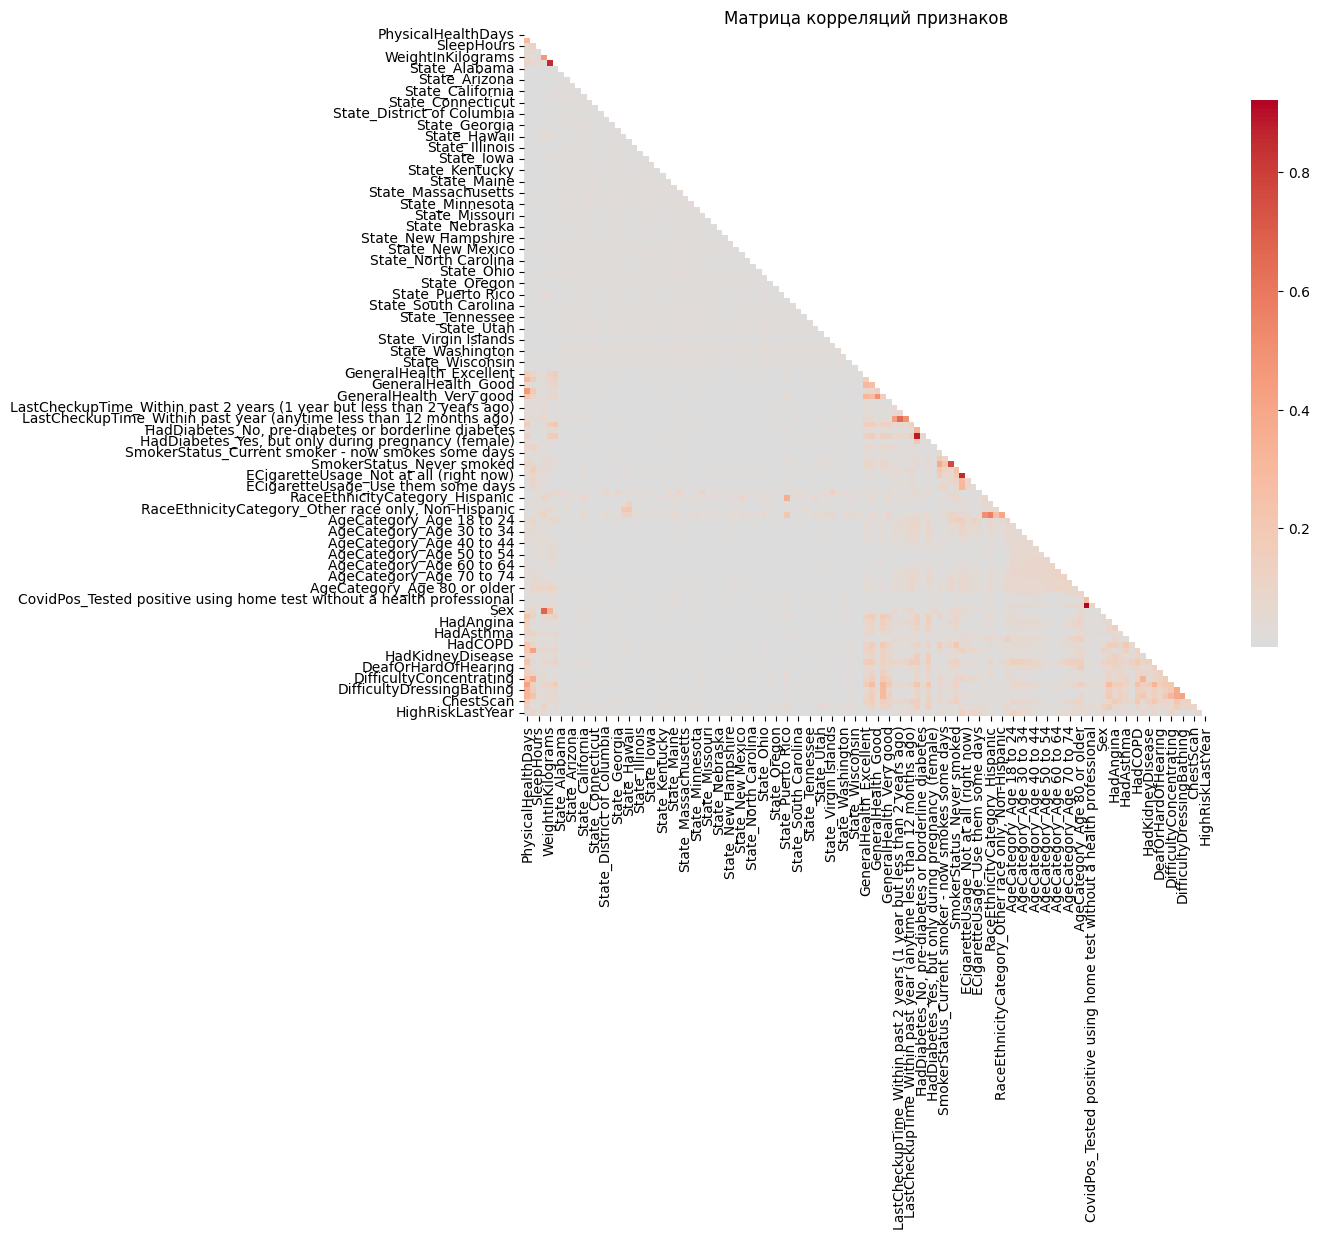

Сохраняем 'WeightInKilograms' (корр с целью: 0.036), удаляем 'BMI' (корр с целью: 0.029)
Сохраняем 'HadDiabetes_Yes' (корр с целью: 0.149), удаляем 'HadDiabetes_No' (корр с целью: 0.139)
Сохраняем 'ECigaretteUsage_Never used e-cigarettes in my entire life' (корр с целью: 0.010), удаляем 'ECigaretteUsage_Not at all (right now)' (корр с целью: 0.003)
Сохраняем 'CovidPos_No' (корр с целью: 0.027), удаляем 'CovidPos_Yes' (корр с целью: 0.018)
Найдено сильно коррелированных пар (correlation > 0.8): 4
Удалено признаков: 4
Исходное количество признаков: 121
Итоговое количество признаков: 117

Топ-10 сильно коррелированных пар:
  1. WeightInKilograms - BMI: 0.854
  2. HadDiabetes_No - HadDiabetes_Yes: 0.883
  3. ECigaretteUsage_Never used e-cigarettes in my entire life - ECigaretteUsage_Not at all (right now): 0.850
  4. CovidPos_No - CovidPos_Yes: 0.921

Удаленные признаки (4):
  1. BMI
  2. CovidPos_Yes
  3. ECigaretteUsage_Not at all (right now)
  4. HadDiabetes_No


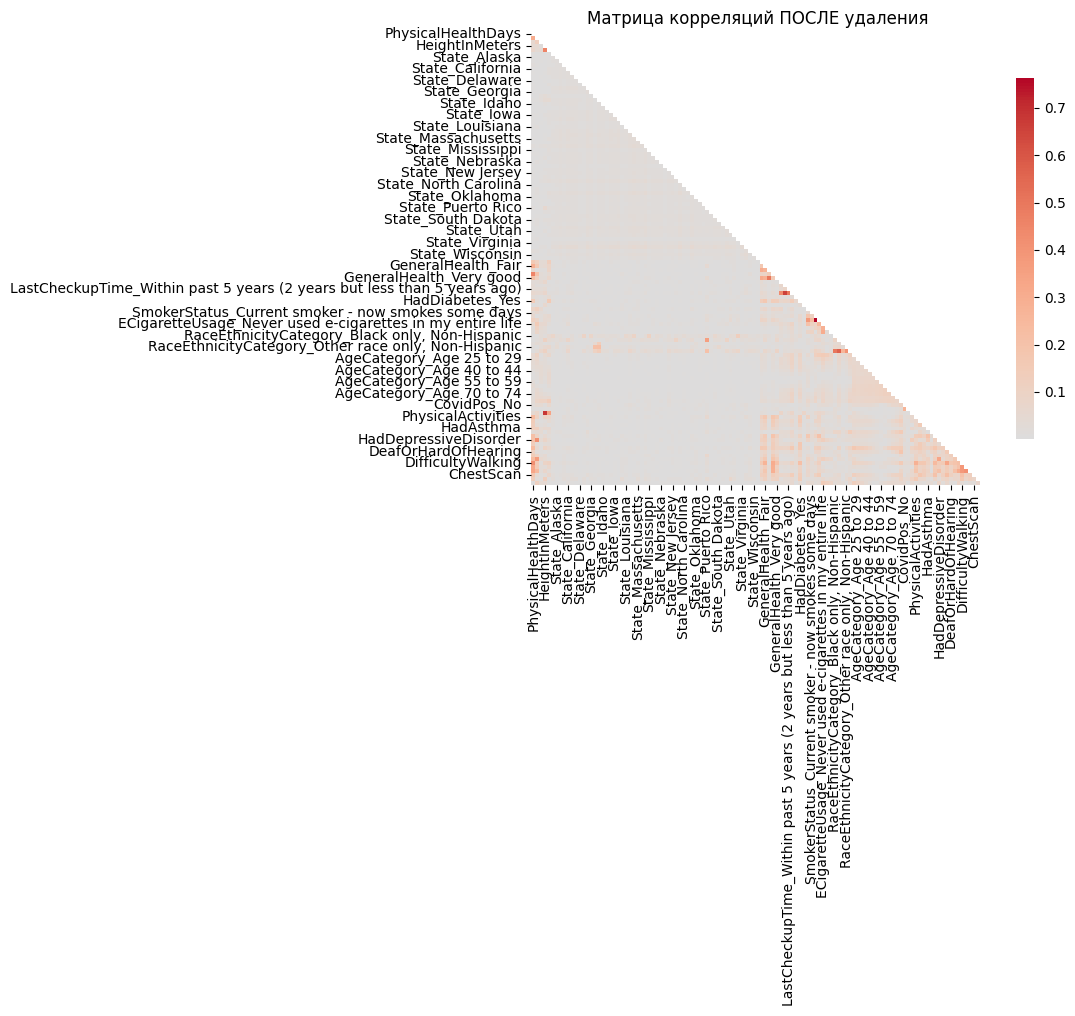

X shape: (376000, 117)
y value counts:
HadHeartAttack
0    354599
1     21401
Name: count, dtype: int64


In [42]:

def remove_correlated_features_had_heart_attack(final_data, correlation_threshold=0.8):

    print(f"Исходное количество признаков: {X.shape[1]}")
    print(f"Размер данных: {final_data.shape}")

    corr_matrix = X.corr().abs()

    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
                square=True, cbar_kws={"shrink": .8})
    plt.title('Матрица корреляций признаков')
    plt.tight_layout()
    plt.show()

    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    correlated_pairs = []
    for col in upper_tri.columns:
        for idx in upper_tri.index:
            if pd.notna(upper_tri.loc[idx, col]) and upper_tri.loc[idx, col] > correlation_threshold:
                correlated_pairs.append({
                    'feature1': idx,
                    'feature2': col,
                    'correlation': upper_tri.loc[idx, col]
                })

    to_drop = set()

    for pair in correlated_pairs:
        corr_with_target1 = abs(final_data[[pair['feature1'], 'HadHeartAttack']].corr().iloc[0,1])
        corr_with_target2 = abs(final_data[[pair['feature2'], 'HadHeartAttack']].corr().iloc[0,1])

        if corr_with_target1 >= corr_with_target2:
            to_drop.add(pair['feature2'])
            print(f"Сохраняем '{pair['feature1']}' (корр с целью: {corr_with_target1:.3f}), удаляем '{pair['feature2']}' (корр с целью: {corr_with_target2:.3f})")
        else:
            to_drop.add(pair['feature1'])
            print(f"Сохраняем '{pair['feature2']}' (корр с целью: {corr_with_target2:.3f}), удаляем '{pair['feature1']}' (корр с целью: {corr_with_target1:.3f})")

    X_reduced = X.drop(columns=to_drop)

    final_data_clean = pd.concat([X_reduced, y], axis=1)

    print(f"Найдено сильно коррелированных пар (correlation > {correlation_threshold}): {len(correlated_pairs)}")
    print(f"Удалено признаков: {len(to_drop)}")
    print(f"Исходное количество признаков: {X.shape[1]}")
    print(f"Итоговое количество признаков: {X_reduced.shape[1]}")

    if correlated_pairs:
        print(f"\nТоп-10 сильно коррелированных пар:")
        for i, pair in enumerate(correlated_pairs[:10]):
            print(f"  {i+1}. {pair['feature1']} - {pair['feature2']}: {pair['correlation']:.3f}")

    if to_drop:
        print(f"\nУдаленные признаки ({len(to_drop)}):")
        for i, feature in enumerate(sorted(to_drop)):
            print(f"  {i+1}. {feature}")

    if len(to_drop) > 0:
        plt.figure(figsize=(12, 10))
        corr_after = X_reduced.corr().abs()
        mask_after = np.triu(np.ones_like(corr_after, dtype=bool))
        sns.heatmap(corr_after, mask=mask_after, annot=False, cmap='coolwarm', center=0,
                   square=True, cbar_kws={"shrink": .8})
        plt.title('Матрица корреляций ПОСЛЕ удаления')
        plt.tight_layout()
        plt.show()

    return final_data_clean, to_drop, correlated_pairs

final_data_clean, dropped_features, correlated_pairs = remove_correlated_features_had_heart_attack(
    final_data,
    correlation_threshold=0.8
)

X = final_data_clean.drop('HadHeartAttack', axis=1)
y = final_data_clean['HadHeartAttack']

print(f"X shape: {X.shape}")
print(f"y value counts:")
print(y.value_counts())

Посмотрим улучшаться ли значения при балансировке после удаления коррелированных параметров

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

Попробуем на логистической регрессии

In [45]:
logistic_model.fit(X_balanced, y_balanced)
y_balanced_predict = logistic_model.predict(X_balanced)
y_test_predict = logistic_model.predict(X_test)

err_balanced = np.mean(y_balanced != y_balanced_predict)
err_test = np.mean(y_test != y_test_predict)

print(f"Ошибка на сбалансированном трейне: {err_balanced:.4f} ({err_balanced*100:.2f}%)")
print(f"Ошибка на тесте: {err_test:.4f} ({err_test*100:.2f}%)")

Ошибка на сбалансированном трейне: 0.0747 (7.47%)
Ошибка на тесте: 0.0624 (6.24%)


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)

0.9376063829787235

In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[86100  2617]
 [ 3248  2035]]


Ошибок второго рода стало еще чуть меньше, но при этом выросло количество ошибок первого рода

Попробуем для случайного леса (n=1000)

In [49]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000, n_jobs=-1)
rf.fit(X_balanced, y_balanced)
y_train_predict = rf.predict(X_balanced)
y_test_predict = rf.predict(X_test)

In [50]:
accuracy_score(y_test, y_test_predict)

0.9415638297872341

In [51]:
print(confusion_matrix(y_test, y_test_predict))

[[86744  1973]
 [ 3520  1763]]


In [52]:
cm = confusion_matrix(y_test, y_test_predict)
TN, FP, FN, TP = cm.ravel()

print(f"TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")

TN: 86744, FP: 1973, FN: 3520, TP: 1763


In [53]:

accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP) if (TP + FP) > 0 else 0

recall = TP / (TP + FN) if (TP + FN) > 0 else 0

f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9416
Precision: 0.4719
Recall: 0.3337
F1-Score: 0.3910


## Общие выводы

Были обучены разные модели машинного обучения и проделан процесс выбора оптимального гиперпараметра. Также для моделей были построены матрицы рассогласования. Были убраны 4 коррелированные переменные (с коэффициентом > 0.8).

Случайный лес (n=1000) и логистическая регрессия показали наилучшие результаты на тестовой выборке, но из-за несбалансированности классов (94/6) возникает проблема ошибок 2 рода, что критично. При балансировке для логистической регрессии и случайного леса(n=1000) ошибка 2 рода уменьшается, но увеличивается ошибка 1 рода(но это не страшно, ведь она менее опасна). Наилучший результат после балансировки показала логистическая регрессия. Возможно, надо поискать еще какие-то алгоритмы по балансировке
